| Model                    |   R2 Score |   RMSE |
|:-------------------------|-----------:|-------:|
| Linear Regression        |     0.5542 | 2.7641 |
| Random Forest Regression |     0.7105 | 2.2276 |


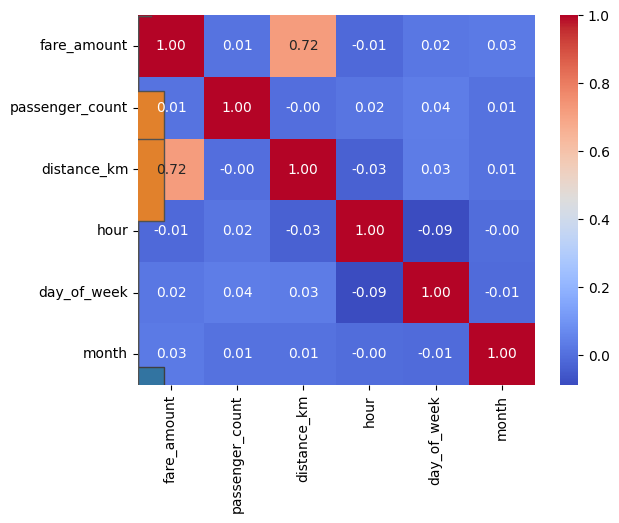

In [98]:
import pandas as pd
from numpy import radians, sin, cos, sqrt, arctan2 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("uber.csv", parse_dates=['pickup_datetime'])
df = df.drop(columns=[col for col in df.columns if 'key' in col.lower() or 'unnamed' in col.lower()], errors='ignore')
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2.0)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2.0)**2
    c = 2 * arctan2(sqrt(a), sqrt(1 - a))
    km = 6371 * c
    return km

df = df.dropna()
df['distance_km'] = haversine(
    df['pickup_longitude'], df['pickup_latitude'], 
    df['dropoff_longitude'], df['dropoff_latitude']
)
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek 
df['month'] = df['pickup_datetime'].dt.month
df = df[df['fare_amount'] > 0] 

Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

upper_bound_fare = Q3 + 1.5 * IQR
lower_bound_fare = Q1 - 1.5 * IQR
df = df[(df['fare_amount'] >= lower_bound_fare) & (df['fare_amount'] <= upper_bound_fare)]

df = df[(df['distance_km'] > 0.01) & (df['distance_km'] < 100)] 
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

sns.boxplot(y=df["fare_amount"])
sns.boxplot(y=df['distance_km'])

df = df.drop(columns=['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

def eval_model(y_true, y_pred):
    return r2_score(y_true, y_pred), sqrt(mean_squared_error(y_true, y_pred))

r2_lr, rmse_lr = eval_model(y_test, y_pred_lr)
r2_rf, rmse_rf = eval_model(y_test, y_pred_rf)

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'R2 Score': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf]
})
print(results.to_markdown(index=False, floatfmt=".4f"))

In [72]:
df = pd.read_csv("uber.csv", parse_dates=['pickup_datetime'])

In [73]:
df = df.drop(columns=[col for col in df.columns if 'key' in col.lower() or 'unnamed' in col.lower()], errors='ignore')

In [74]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [75]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2.0)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2.0)**2
    c = 2 * arctan2(sqrt(a), sqrt(1 - a))
    km = 6371 * c
    return km

In [76]:
df = df.dropna()

In [77]:
df['distance_km'] = haversine(
    df['pickup_longitude'], df['pickup_latitude'], 
    df['dropoff_longitude'], df['dropoff_latitude']
)

In [78]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek 
df['month'] = df['pickup_datetime'].dt.month

In [79]:
df = df[df['fare_amount'] > 0] 

In [80]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

upper_bound_fare = Q3 + 1.5 * IQR
lower_bound_fare = Q1 - 1.5 * IQR
df = df[(df['fare_amount'] >= lower_bound_fare) & (df['fare_amount'] <= upper_bound_fare)]

<Axes: ylabel='fare_amount'>

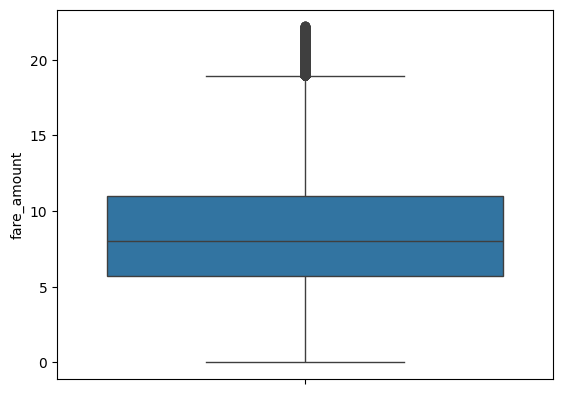

In [81]:
sns.boxplot(y=df["fare_amount"])

In [82]:
df = df[(df['distance_km'] > 0.01) & (df['distance_km'] < 100)] 
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

<Axes: ylabel='distance_km'>

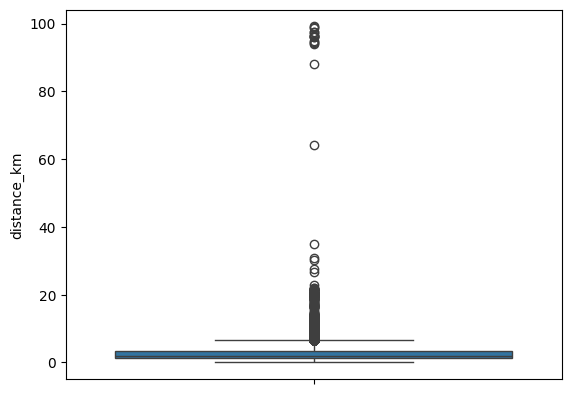

In [83]:
sns.boxplot(y=df['distance_km'])

In [84]:
df = df.drop(columns=['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

In [85]:
correlation_matrix = df.corr()

In [86]:
df.head()

,fare_amount,passenger_count,distance_km,hour,day_of_week,month
0,7.5,1,1.683323,19,3,5
1,7.7,1,2.457590,20,4,7
2,12.9,1,5.036377,21,0,8
3,5.3,3,1.661683,8,4,6
4,16.0,5,4.475450,17,3,8


<Axes: >

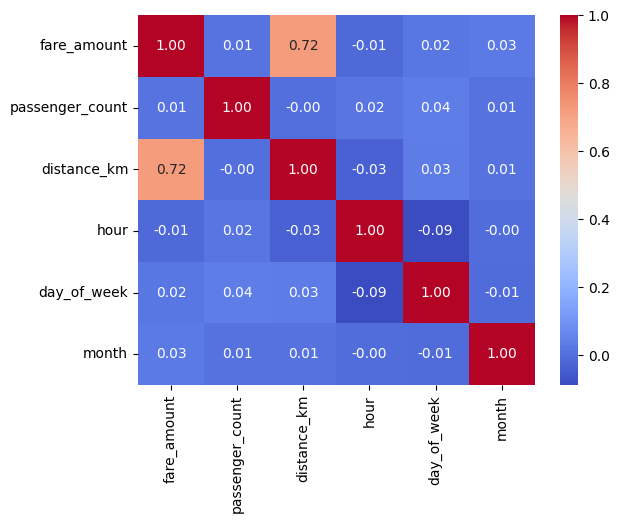

In [87]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [88]:
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [91]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [92]:
def eval_model(y_true, y_pred):
    return r2_score(y_true, y_pred), sqrt(mean_squared_error(y_true, y_pred))

In [93]:
r2_lr, rmse_lr = eval_model(y_test, y_pred_lr)
r2_rf, rmse_rf = eval_model(y_test, y_pred_rf)

In [94]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'R2 Score': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf]
})

In [95]:
print(results.to_markdown(index=False, floatfmt=".4f"))

| Model                    |   R2 Score |   RMSE |
|:-------------------------|-----------:|-------:|
| Linear Regression        |     0.5542 | 2.7641 |
| Random Forest Regression |     0.7105 | 2.2276 |
